<a href="https://colab.research.google.com/github/teghdeep/Dockship_Stock_Pred/blob/main/DockshipMLChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Dependicies

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree

## Importing Datasets

In [ ]:
url='https://raw.githubusercontent.com/IntellectualCoders/DockshipMLComp/main/new_train.csv'
df=pd.read_csv(url)

In [ ]:
url_test='https://raw.githubusercontent.com/IntellectualCoders/DockshipMLComp/main/new_test.csv'
df_test=pd.read_csv(url_test)

In [ ]:
df.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,Close-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,Close-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,Close-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,281.50,283.00,283.72,3191773,90557243170000,2095.00,2097.8,2045.00,2077.25,2088.95,70547,14736933230000,851.65,864.80,833.1,837.95,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
1,2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,279.25,281.30,281.05,2704797,76017076445000,2061.45,2098.0,2023.00,2079.85,2059.52,55547,11440017990000,844.70,849.90,823.0,842.30,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2,2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,282.50,285.50,285.34,2489752,71043460510000,2131.50,2131.5,2091.05,2114.90,2107.84,55130,11620529360000,851.40,859.05,848.2,854.10,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
3,2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,277.00,290.85,289.81,3188813,92414802585000,2114.90,2156.0,2095.50,2146.75,2145.36,29302,6286330280000,854.10,868.60,854.1,865.85,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
4,2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,285.00,287.70,287.01,2198836,63109395135000,2132.35,2209.0,2112.00,2185.25,2180.52,78919,17208425860000,712.00,850.00,712.0,841.95,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


In [ ]:
df_test.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2011-08-04,484.1,488.90,475.00,481.00,1829606,88003633160000,204.90,206.75,199.20,202.98,10501999,213174133870000,3011.15,3119.95,3011.15,3078.97,53783,16559616060000,1008.50,1015.0,990.00,1003.31,2716435,272542181190000,1303.6,1312.8,1281.00,1297.04,1569675,203593328285000
1,2011-08-05,465.0,475.80,457.10,469.56,3156094,148196817355000,195.00,198.00,190.50,194.86,13424736,261588793565000,3091.65,3095.00,3012.00,3061.60,129372,39608524605000,970.00,979.7,950.00,961.50,4644498,446567961345000,1245.0,1252.5,1200.00,1229.09,3125692,384176649890000
2,2011-08-08,463.0,480.00,458.05,465.04,4308373,200357861965000,193.90,197.80,189.65,194.89,9002509,175445729750000,3015.05,3109.00,3010.00,3069.09,46725,14340318455000,940.05,975.0,933.40,953.24,3450619,328925252905000,1205.2,1265.8,1200.55,1232.93,1660178,204687918340000
3,2011-08-09,450.0,473.55,449.85,460.88,4490924,206978212685000,190.25,202.10,190.10,197.61,19202643,379464261110000,3070.00,3164.00,2988.00,3113.84,88749,27635029505000,915.00,967.6,910.45,938.80,5346085,501890604795000,1190.5,1238.3,1180.90,1206.06,3618186,436376441205000
4,2011-08-10,494.8,494.80,473.40,478.06,3267226,156192368225000,202.00,202.85,196.00,199.07,9274996,184640866420000,3125.00,3195.00,3125.00,3170.39,52720,16714302965000,963.95,971.2,957.70,964.75,3379659,326053305165000,1242.0,1253.7,1225.30,1242.10,1903396,236421421150000


In [ ]:
print(df.shape)
df.dropna(inplace=True,how='any')
print(df.shape)

(299, 36)
(299, 36)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 298
Data columns (total 36 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              299 non-null    object 
 1   Open-Stock-1      299 non-null    float64
 2   High-Stock-1      299 non-null    float64
 3   Low-Stock-1       299 non-null    float64
 4   Close-Stock-1     299 non-null    float64
 5   VWAP-Stock-1      299 non-null    float64
 6   Volume-Stock-1    299 non-null    int64  
 7   Turnover-Stock-1  299 non-null    int64  
 8   Open-Stock-2      299 non-null    float64
 9   High-Stock-2      299 non-null    float64
 10  Low-Stock-2       299 non-null    float64
 11  Close-Stock-2     299 non-null    float64
 12  VWAP-Stock-2      299 non-null    float64
 13  Volume-Stock-2    299 non-null    int64  
 14  Turnover-Stock-2  299 non-null    int64  
 15  Open-Stock-3      299 non-null    float64
 16  High-Stock-3      299 non-null    float64
 1

## Plotting SNS HeatPlot

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

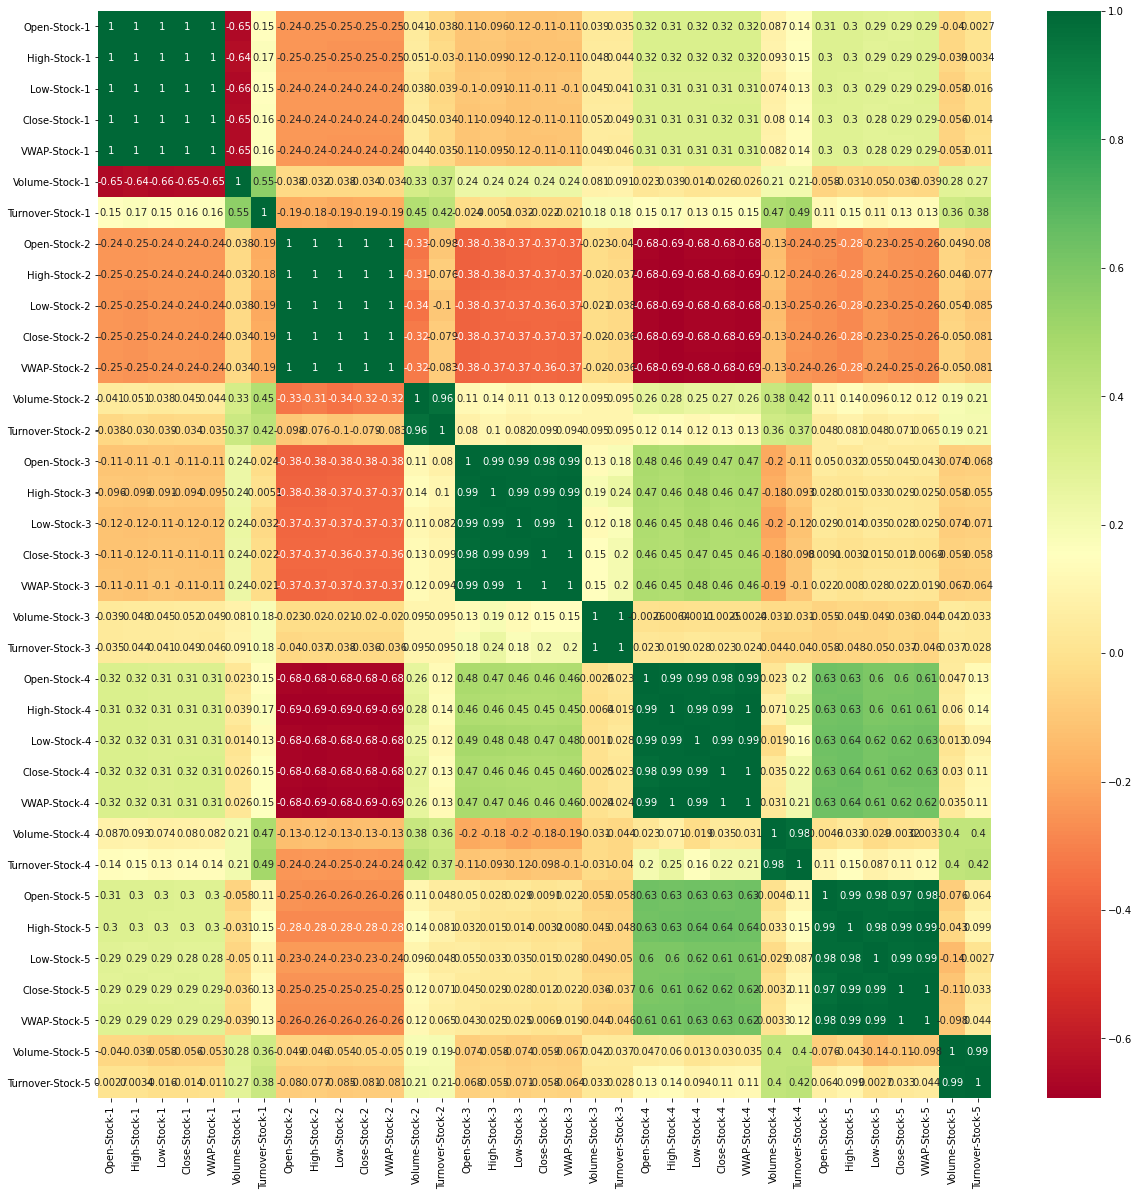

In [ ]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Data preprocessing

In [ ]:
df.describe()

,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,Close-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,Close-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,Close-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
count,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02,299.000000,299.000000,299.000000,299.000000,299.000000,2.990000e+02,2.990000e+02
mean,2143.761371,2168.767057,2117.974080,2143.821572,2143.167692,8.887711e+05,1.745160e+14,194.891973,197.075753,192.474916,194.908863,194.887759,6.458382e+06,1.204030e+14,2701.216221,2738.352676,2665.551839,2698.490468,2702.157258,9.825917e+04,2.703371e+13,1042.224916,1057.009197,1027.838127,1042.537291,1043.030702,3.684102e+06,3.847515e+14,1334.502508,1352.688629,1314.262542,1333.175753,1333.481204,1.452351e+06,1.929843e+14
std,410.899677,415.209457,405.959346,410.811877,410.279270,6.008330e+05,8.226473e+13,44.718733,45.140896,44.427882,44.953631,44.908437,3.794925e+06,6.552082e+13,244.542744,247.419405,241.140781,242.712107,244.001772,1.334930e+05,4.019205e+13,96.691557,95.693321,94.176226,94.124373,94.085013,1.675875e+06,1.817891e+14,100.768718,100.730048,99.079224,99.713093,99.205523,7.033592e+05,9.361878e+13
min,478.700000,487.900000,476.000000,482.050000,481.890000,3.925400e+04,9.406739e+12,152.500000,155.850000,149.000000,150.650000,151.960000,1.118075e+06,1.983666e+13,2061.450000,2097.800000,2023.000000,2077.250000,2059.520000,8.816000e+03,2.339094e+12,712.000000,834.200000,712.000000,817.500000,823.480000,4.235880e+05,5.394387e+13,1156.100000,1194.800000,1150.000000,1160.650000,1169.910000,7.335200e+04,1.138273e+13
25%,2079.200000,2110.100000,2052.775000,2083.000000,2083.265000,5.485695e+05,1.141443e+14,169.125000,170.900000,167.050000,168.750000,169.155000,4.079292e+06,7.776406e+13,2545.000000,2579.550000,2506.175000,2534.500000,2542.400000,3.781300e+04,1.014719e+13,999.950000,1011.200000,987.875000,1000.775000,1000.215000,2.531522e+06,2.669888e+14,1253.175000,1270.875000,1235.500000,1254.050000,1254.165000,9.689265e+05,1.300165e+14
50%,2230.000000,2264.900000,2205.200000,2232.000000,2226.640000,7.367350e+05,1.584380e+14,176.700000,178.400000,174.000000,176.500000,176.250000,5.769577e+06,1.084020e+14,2674.000000,2709.000000,2645.000000,2663.200000,2670.070000,6.491600e+04,1.711518e+13,1047.850000,1065.450000,1036.150000,1049.200000,1051.980000,3.310703e+06,3.370082e+14,1314.000000,1329.500000,1292.000000,1311.500000,1309.890000,1.324664e+06,1.747469e+14
75%,2354.900000,2380.000000,2329.250000,2355.000000,2355.085000,1.011911e+06,2.094621e+14,194.275000,196.075000,193.000000,194.550000,194.350000,7.958142e+06,1.457942e+14,2828.625000,2871.775000,2801.000000,2820.325000,2835.015000,1.184385e+05,3.277625e+13,1112.100000,1124.000000,1095.200000,1110.600000,1108.635000,4.321131e+06,4.636005e+14,1386.500000,1402.750000,1370.000000,1384.750000,1385.440000,1.702507e+06,2.268061e+14
max,2566.000000,2583.300000,2553.700000,2565.800000,2570.700000,5.354489e+06,4.793651e+14,309.750000,313.450000,309.000000,312.800000,311.830000,3.032827e+07,5.012088e+14,3341.150000,3387.000000,3283.550000,3313.950000,3324.140000,1.871721e+06,5.883493e+14,1273.000000,1279.000000,1269.350000,1273.350000,1273.500000,1.167429e+07,1.278359e+15,1595.000000,1608.500000,1571.100000,1588.750000,1587.400000,5.100637e+06,7.278991e+14


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1909eecf98>,
      dtype=object)

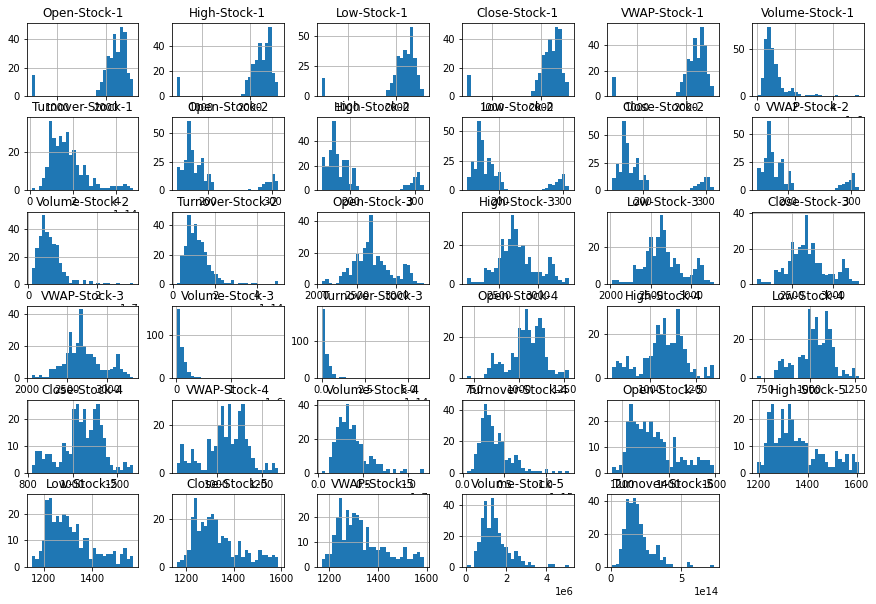

In [ ]:
df.hist(bins=30, figsize=(15, 10))

In [ ]:
skewValue = df.skew(0,1)
skewValue

Open-Stock-1       -3.147039
High-Stock-1       -3.176070
Low-Stock-1        -3.156502
Close-Stock-1      -3.168753
VWAP-Stock-1       -3.176146
Volume-Stock-1      3.182177
Turnover-Stock-1    1.352826
Open-Stock-2        1.670250
High-Stock-2        1.664292
Low-Stock-2         1.666840
Close-Stock-2       1.664804
VWAP-Stock-2        1.664128
Volume-Stock-2      2.375246
Turnover-Stock-2    2.314755
Open-Stock-3        0.293695
High-Stock-3        0.324817
Low-Stock-3         0.314537
Close-Stock-3       0.357774
VWAP-Stock-3        0.330278
Volume-Stock-3      8.520456
Turnover-Stock-3    9.646605
Open-Stock-4       -0.415685
High-Stock-4       -0.380276
Low-Stock-4        -0.411978
Close-Stock-4      -0.350257
VWAP-Stock-4       -0.369286
Volume-Stock-4      1.528790
Turnover-Stock-4    1.577583
Open-Stock-5        0.811638
High-Stock-5        0.835026
Low-Stock-5         0.826147
Close-Stock-5       0.797357
VWAP-Stock-5        0.835811
Volume-Stock-5      1.680499
Turnover-Stock

In [ ]:
from scipy.stats import boxcox
from scipy.stats import skew

In [ ]:
df["Volume-Stock-1"] = np.log1p(df["Volume-Stock-1"])
df["Volume-Stock-2"] = np.log1p(df["Volume-Stock-2"])
df["Volume-Stock-3"] = np.log1p(df["Volume-Stock-3"])
df["Volume-Stock-4"] = np.log1p(df["Volume-Stock-4"])
df["Volume-Stock-5"] = np.log1p(df["Volume-Stock-5"])
df["Turnover-Stock-1"] = np.log1p(df["Turnover-Stock-1"])
df["Turnover-Stock-2"] = np.log1p(df["Turnover-Stock-2"])
df["Turnover-Stock-3"] = np.log1p(df["Turnover-Stock-3"])
df["Turnover-Stock-4"] = np.log1p(df["Turnover-Stock-4"])
df["Turnover-Stock-5"] = np.log1p(df["Turnover-Stock-5"])
df["Open-Stock-1"] , lam1= boxcox(df["Open-Stock-1"])
df["High-Stock-1"] , lam2 = boxcox(df["High-Stock-1"])
df["Low-Stock-1"] , lam3 = boxcox(df["Low-Stock-1"])
df["VWAP-Stock-1"] , lam4 = boxcox(df["VWAP-Stock-1"])
df["Open-Stock-2"] , lam1= boxcox(df["Open-Stock-2"])
df["High-Stock-2"] , lam2 = boxcox(df["High-Stock-2"])
df["Low-Stock-2"] , lam3 = boxcox(df["Low-Stock-2"])
df["VWAP-Stock-2"] , lam4 = boxcox(df["VWAP-Stock-2"])
df.skew(0,1)


df_test["Volume-Stock-1"] = np.log1p(df_test["Volume-Stock-1"])
df_test["Volume-Stock-2"] = np.log1p(df_test["Volume-Stock-2"])
df_test["Volume-Stock-3"] = np.log1p(df_test["Volume-Stock-3"])
df_test["Volume-Stock-4"] = np.log1p(df_test["Volume-Stock-4"])
df_test["Volume-Stock-5"] = np.log1p(df_test["Volume-Stock-5"])
df_test["Turnover-Stock-1"] = np.log1p(df_test["Turnover-Stock-1"])
df_test["Turnover-Stock-2"] = np.log1p(df_test["Turnover-Stock-2"])
df_test["Turnover-Stock-3"] = np.log1p(df_test["Turnover-Stock-3"])
df_test["Turnover-Stock-4"] = np.log1p(df_test["Turnover-Stock-4"])
df_test["Turnover-Stock-5"] = np.log1p(df_test["Turnover-Stock-5"])
df_test["Open-Stock-1"] , lam1= boxcox(df_test["Open-Stock-1"])
df_test["High-Stock-1"] , lam2 = boxcox(df_test["High-Stock-1"])
df_test["Low-Stock-1"] , lam3 = boxcox(df_test["Low-Stock-1"])
df_test["VWAP-Stock-1"] , lam4 = boxcox(df_test["VWAP-Stock-1"])
df_test["Open-Stock-2"] , lam1= boxcox(df_test["Open-Stock-2"])
df_test["High-Stock-2"] , lam2 = boxcox(df_test["High-Stock-2"])
df_test["Low-Stock-2"] , lam3 = boxcox(df_test["Low-Stock-2"])
df_test["VWAP-Stock-2"] , lam4 = boxcox(df_test["VWAP-Stock-2"])

In [ ]:
df

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,Close-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,Close-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,Close-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2010-06-01,8.028401e+12,1.438957e+13,7.355304e+12,1855.10,1.113043e+13,2.656782,3.505237,0.242254,0.238466,0.244293,283.00,0.241919,2.771093,3.500651,2095.00,2097.80,2045.00,2077.25,2088.95,2.498485,3.444301,851.65,864.80,833.10,837.95,844.44,2.783209,3.538708,1235.0,1238.00,1177.00,1181.70,1197.29,2.734078,3.526251
1,2010-06-02,7.322157e+12,1.353684e+13,7.191421e+12,1853.05,1.080971e+13,2.691861,3.520197,0.242254,0.238466,0.244293,281.30,0.241919,2.760677,3.495355,2061.45,2098.00,2023.00,2079.85,2059.52,2.478637,3.436183,844.70,849.90,823.00,842.30,838.31,2.773574,3.533981,1195.0,1206.95,1168.50,1201.15,1189.87,2.713605,3.516847
2,2010-06-03,7.589004e+12,1.504103e+13,7.796381e+12,1905.60,1.211929e+13,2.669267,3.511209,0.242254,0.238466,0.244293,285.50,0.241919,2.755423,3.493300,2131.50,2131.50,2091.05,2114.90,2107.84,2.478005,3.436687,851.40,859.05,848.20,854.10,853.51,2.755545,3.526122,1211.0,1248.00,1211.00,1242.30,1231.63,2.721922,3.521600
3,2010-06-04,8.318045e+12,1.503440e+13,8.076505e+12,1885.70,1.199402e+13,2.649083,3.502486,0.242254,0.238466,0.244293,290.85,0.241919,2.771035,3.501263,2114.90,2156.00,2095.50,2146.75,2145.36,2.423514,3.416723,854.10,868.60,854.10,865.85,862.85,2.766446,3.531500,1240.0,1258.00,1240.00,1245.45,1249.72,2.720647,3.521459
4,2010-06-07,7.637842e+12,1.454553e+13,6.877468e+12,1876.65,1.157778e+13,2.693050,3.521202,0.242254,0.238466,0.244293,287.70,0.241919,2.747491,3.489693,2132.35,2209.00,2112.00,2185.25,2180.52,2.507662,3.449239,712.00,850.00,712.00,841.95,839.89,2.776337,3.535329,1218.6,1225.00,1196.00,1214.80,1209.27,2.719280,3.519872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2011-07-28,3.311834e+10,5.334406e+10,2.987720e+10,487.30,4.240112e+10,2.802963,3.532236,0.242254,0.238466,0.244293,206.25,0.241919,2.868176,3.539197,3105.85,3143.00,3105.85,3120.85,3121.98,2.561287,3.481597,1012.10,1035.50,1010.00,1017.45,1021.77,2.782333,3.543821,1285.0,1307.95,1285.00,1301.50,1297.00,2.715875,3.520419
295,2011-07-29,3.056960e+10,4.916258e+10,2.899597e+10,486.80,4.092244e+10,2.767158,3.514876,0.242254,0.238466,0.244293,208.35,0.241919,2.856609,3.533896,3122.40,3140.05,3115.00,3134.00,3129.24,2.421295,3.428224,1011.00,1051.00,1003.60,1036.75,1032.52,2.814990,3.559502,1300.0,1342.00,1292.40,1337.50,1325.46,2.736393,3.530284
296,2011-08-01,3.149412e+10,5.176741e+10,2.985174e+10,488.00,4.216631e+10,2.747594,3.505876,0.242254,0.238466,0.244293,208.90,0.241919,2.819960,3.515480,3141.95,3163.00,3053.50,3067.85,3100.07,2.442389,3.435681,1052.80,1059.70,1038.70,1045.35,1049.87,2.744182,3.526985,1349.0,1367.55,1346.50,1353.00,1357.02,2.709367,3.518854
297,2011-08-02,3.005789e+10,4.832386e+10,2.872312e+10,482.85,4.010074e+10,2.740831,3.502352,0.242254,0.238466,0.244293,204.75,0.241919,2.824328,3.517089,3067.85,3069.00,3001.10,3052.15,3047.39,2.571465,3.484924,1039.90,1041.35,1018.10,1021.70,1025.73,2.765627,3.536168,1345.0,1347.95,1326.10,1342.80,1334.07,2.693623,3.511368


## Declaring X and Y

In [ ]:
df.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,Close-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,Close-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,Close-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,281.50,283.00,283.72,3191773,90557243170000,2095.00,2097.8,2045.00,2077.25,2088.95,70547,14736933230000,851.65,864.80,833.1,837.95,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
1,2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,279.25,281.30,281.05,2704797,76017076445000,2061.45,2098.0,2023.00,2079.85,2059.52,55547,11440017990000,844.70,849.90,823.0,842.30,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2,2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,282.50,285.50,285.34,2489752,71043460510000,2131.50,2131.5,2091.05,2114.90,2107.84,55130,11620529360000,851.40,859.05,848.2,854.10,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
3,2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,277.00,290.85,289.81,3188813,92414802585000,2114.90,2156.0,2095.50,2146.75,2145.36,29302,6286330280000,854.10,868.60,854.1,865.85,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
4,2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,285.00,287.70,287.01,2198836,63109395135000,2132.35,2209.0,2112.00,2185.25,2180.52,78919,17208425860000,712.00,850.00,712.0,841.95,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000


In [ ]:
cols= list(df.columns.values)
X1 = df[cols[1:4] +cols[5:6]]
X2 = df[cols[8:11] + cols[12:13]]
X3 = df[cols[15:18] +cols[19:20]]
X4 = df[cols[22:25] + cols[26:27]]
X5 = df[cols[29:32] +cols[33:34]]
y1 = df[cols[4]]
y2 = df[cols[11]]
y3 = df[cols[18]]
y4 = df[cols[25]]
y5 = df[cols[32]]

In [ ]:
X5.head()

,Open-Stock-5,High-Stock-5,Low-Stock-5,VWAP-Stock-5
0,1235.0,1238.00,1177.0,1197.29
1,1195.0,1206.95,1168.5,1189.87
2,1211.0,1248.00,1211.0,1231.63
3,1240.0,1258.00,1240.0,1249.72
4,1218.6,1225.00,1196.0,1209.27


In [ ]:
y1

0      1855.10
1      1853.05
2      1905.60
3      1885.70
4      1876.65
        ...   
294     487.30
295     486.80
296     488.00
297     482.85
298     482.05
Name: Close-Stock-1, Length: 299, dtype: float64

In [ ]:
cols_t= list(df_test.columns.values)
X1_test = df_test[cols_t[1:5] ]
X2_test = df_test[cols_t[7:11] ]
X3_test = df_test[cols_t[13:17] ]
X4_test = df_test[cols_t[19:23] ]
X5_test = df_test[cols_t[25:29] ]


In [ ]:
X3_test

,Open-Stock-3,High-Stock-3,Low-Stock-3,VWAP-Stock-3
0,3011.15,3119.95,3011.15,3078.97
1,3091.65,3095.00,3012.00,3061.60
2,3015.05,3109.00,3010.00,3069.09
3,3070.00,3164.00,2988.00,3113.84
4,3125.00,3195.00,3125.00,3170.39
...,...,...,...,...
92,2720.00,2775.00,2652.00,2713.39
93,2760.25,2769.20,2640.95,2693.93
94,2647.15,2695.00,2641.05,2665.46
95,2655.05,2692.00,2655.05,2671.18


## Applying Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()

In [ ]:
model1.fit(X1, y1)
model2.fit(X2, y2)
model3.fit(X3, y3)
model4.fit(X4, y4)
model5.fit(X5, y5)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y1_pred = model1.predict(X1_test)
y2_pred = model2.predict(X2_test)
y3_pred = model3.predict(X3_test)
y4_pred = model4.predict(X4_test)
y5_pred = model5.predict(X5_test)

In [ ]:
y1_pred

array([83560714.99057077, 68477148.49252191, 72177706.05299006,
       65479449.17817502, 90321355.70269474, 78802044.2875568 ,
       79095964.28242725, 70517788.30505459, 64825508.45059068,
       67310482.57123931, 56218785.69994403, 56631585.75300067,
       55355691.47074479, 55370031.547027  , 52327518.35736186,
       45486487.35520853, 51583664.50130687, 67309090.31203254,
       77216283.71848895, 66530091.08446006, 68840923.03803983,
       85346742.33322878, 84705527.44728586, 79768812.69751555,
       63819145.05925415, 68462417.98507391, 76098136.74558818,
       82512606.23636733, 85159771.49693121, 81537844.259902  ,
       89640353.24107705, 95949727.61831261, 83293643.05841532,
       61935126.83356573, 50980452.24544522, 55062457.15107134,
       57818664.45318154, 67449496.42390634, 67435937.53329222,
       57274172.84080935, 49865249.26314628, 49765501.04344287,
       53040604.16796091, 51676337.61210813, 57770449.77520944,
       62146236.92673016, 69087921.02216

In [ ]:
col_1 = df_test[cols_t[0]]
rows = zip(col_1,y1_pred,y2_pred,y3_pred,y4_pred,y5_pred)
col_1

0     2011-08-04
1     2011-08-05
2     2011-08-08
3     2011-08-09
4     2011-08-10
         ...    
92    2011-12-22
93    2011-12-23
94    2011-12-26
95    2011-12-27
96    2011-12-28
Name: Date, Length: 97, dtype: object

In [ ]:
import csv

with open('submission20.csv', "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
regr_1 = DecisionTreeRegressor(max_depth=5)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_3 = DecisionTreeRegressor(max_depth=5)
regr_4 = DecisionTreeRegressor(max_depth=5)
regr_5 = DecisionTreeRegressor(max_depth=5)

In [ ]:
regr_1.fit(X1, y1)
regr_2.fit(X2, y2)
regr_3.fit(X3, y3)
regr_4.fit(X4, y4)
regr_5.fit(X5, y5)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
y_1 = regr_1.predict(X1_test)
y_2 = regr_2.predict(X2_test)
y_3 = regr_3.predict(X3_test)
y_4 = regr_4.predict(X4_test)
y_5 = regr_5.predict(X5_test)

In [ ]:
col_1 = df_test[cols_t[0]]
rows = zip(col_1,y_1,y_2,y_3,y_4,y_5)

In [ ]:
import csv

with open('submission3.csv', "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

## Lasso Regression

In [ ]:
from sklearn import linear_model
clf1 = linear_model.Lasso(alpha=1e-10)
clf2 = linear_model.Lasso(alpha=1e-10)
clf3 = linear_model.Lasso(alpha=1e-10)
clf4 = linear_model.Lasso(alpha=1e-10)
clf5 = linear_model.Lasso(alpha=1e-10)

In [ ]:
clf1.fit(X1,y1)
clf2.fit(X2,y2)
clf3.fit(X3,y3)
clf4.fit(X4,y4)
clf5.fit(X5,y5)

Lasso(alpha=1e-10, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
yl1 = clf1.predict(X1_test)
yl2 = clf2.predict(X2_test)
yl3 = clf3.predict(X3_test)
yl4 = clf4.predict(X4_test)
yl5 = clf5.predict(X5_test)

In [ ]:
col_1 = df_test[cols_t[0]]
rows = zip(col_1,yl1,yl2,yl3,yl4,yl5)

In [ ]:
import csv

with open('submission13.csv', "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

## Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rmodel1 = Ridge(alpha=10)
rmodel2 = Ridge(alpha=10)
rmodel3 = Ridge(alpha=10)
rmodel4 = Ridge(alpha=10)
rmodel5 = Ridge(alpha=10)

In [ ]:
rmodel1.fit(X1, y1)
rmodel2.fit(X2, y2)
rmodel3.fit(X3, y3)
rmodel4.fit(X4, y4)
rmodel5.fit(X5, y5)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [ ]:
y1_pred = rmodel1.predict(X1_test)
y2_pred = rmodel2.predict(X2_test)
y3_pred = rmodel3.predict(X3_test)
y4_pred = rmodel4.predict(X4_test)
y5_pred = rmodel5.predict(X5_test)

In [ ]:
col_1 = df_test[cols_t[0]]
rows = zip(col_1,y1_pred,y2_pred,y3_pred,y4_pred,y5_pred)
col_1

0     2011-08-04
1     2011-08-05
2     2011-08-08
3     2011-08-09
4     2011-08-10
         ...    
92    2011-12-22
93    2011-12-23
94    2011-12-26
95    2011-12-27
96    2011-12-28
Name: Date, Length: 97, dtype: object

In [ ]:
import csv

with open('submission21.csv', "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

## ANN

In [ ]:
from joblib.numpy_pickle_utils import xrange
from random import random

In [ ]:
class NeuralNet(object): 
    def __init__(self): 
        # Generate random numbers 
        random.seed(1) 
  
        # Assign random weights to a 3 x 1 matrix, 
        self.synaptic_weights = 2 * random.random((3, 1)) - 1
  
    # The Sigmoid function 
    def __sigmoid(self, x): 
        return 1 / (1 + exp(-x)) 
  
    # The derivative of the Sigmoid function. 
    # This is the gradient of the Sigmoid curve. 
    def __sigmoid_derivative(self, x): 
        return x * (1 - x) 
  
    # Train the neural network and adjust the weights each time. 
    def train(self, inputs, outputs, training_iterations): 
        for iteration in xrange(training_iterations): 
            # Pass the training set through the network. 
            output = self.learn(inputs) 
  
            # Calculate the error 
            error = outputs - output 
  
            # Adjust the weights by a factor 
            factor = dot(inputs.T, error * self.__sigmoid_derivative(output)) 
            self.synaptic_weights += factor 
  
        # The neural network thinks. 
  
    def learn(self, inputs): 
        return self.__sigmoid(dot(inputs, self.synaptic_weights)) 
  
  
if __name__ == "__main__": 
    # Initialize 
    neural_network = NeuralNet() 
  
    # The training set. 
    inputs = X1
    outputs = y1
  
    # Train the neural network 
    neural_network.train(inputs, outputs, 10000) 
  
    # Test the neural network with a test example. 
    print(neural_network.learn(X1))

AttributeError: ignored

## MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
regr1 = MLPRegressor(random_state=1, max_iter=1000000, alpha = 0.0001, activation='relu').fit(X1, y1)
regr2 = MLPRegressor(random_state=1, max_iter=1000).fit(X2, y2)
regr3 = MLPRegressor(random_state=1, max_iter=1000).fit(X3, y3)
regr4 = MLPRegressor(random_state=1, max_iter=1000).fit(X4, y4)
regr5 = MLPRegressor(random_state=1, max_iter=1000).fit(X5, y5)

In [ ]:
y1p = regr1.predict(X1_test)
y2p = regr2.predict(X2_test)
y3p = regr3.predict(X3_test)
y4p = regr4.predict(X4_test)
y5p = regr5.predict(X5_test)

In [ ]:
y1p

array([497.96027614, 481.79874912, 480.47688961, 471.67443269,
       501.75493038, 495.16742445, 492.50502629, 485.18671904,
       476.26270002, 482.4691513 , 470.61864256, 472.87915564,
       470.19850886, 472.23669513, 467.43109314, 457.63474008,
       463.41621603, 479.74019956, 493.45488187, 483.83718221,
       483.22887877, 495.98087999, 501.58486328, 496.04576795,
       481.97272308, 485.45592663, 485.18207366, 497.60983815,
       499.9830247 , 497.62538362, 502.79246342, 509.19339492,
       496.43581924, 477.79151277, 465.5592477 , 472.79881399,
       474.28876918, 477.68473581, 483.26588314, 472.60151827,
       464.60798716, 461.43591769, 467.06550833, 467.88051094,
       475.34692323, 476.4547166 , 488.43314603, 485.31054591,
       492.12364654, 490.72647181, 501.67038128, 502.57297517,
       504.44259552, 506.88339621, 488.7156741 , 487.37545218,
       501.16758928, 500.19783959, 501.14656463, 497.5247211 ,
       494.53596209, 500.43542379, 498.39632721, 497.74

In [ ]:
col_1 = df_test[cols_t[0]]
rows = zip(col_1,y1p,y2p,y3p,y4p,y5p)
col_1

0     2011-08-04
1     2011-08-05
2     2011-08-08
3     2011-08-09
4     2011-08-10
         ...    
92    2011-12-22
93    2011-12-23
94    2011-12-26
95    2011-12-27
96    2011-12-28
Name: Date, Length: 97, dtype: object

In [ ]:
import csv

with open('submission15.csv', "w") as f:
    writer = csv.writer(f)
    for row in rows:
        writer.writerow(row)

## LSTM

In [ ]:
training_data = df.iloc[:, 4:5]

training_data.shape
training_data.head()

,Close-Stock-1
0,1855.10
1,1853.05
2,1905.60
3,1885.70
4,1876.65


In [ ]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler(feature_range = (0, 1))
training_data = mm.fit_transform(training_data)

## New Code

In [ ]:
import time
import math
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM
import numpy as np
import pandas as pd
import sklearn.preprocessing as prep

In [ ]:
df.head()

,Date,Open-Stock-1,High-Stock-1,Low-Stock-1,Close-Stock-1,VWAP-Stock-1,Volume-Stock-1,Turnover-Stock-1,Open-Stock-2,High-Stock-2,Low-Stock-2,Close-Stock-2,VWAP-Stock-2,Volume-Stock-2,Turnover-Stock-2,Open-Stock-3,High-Stock-3,Low-Stock-3,Close-Stock-3,VWAP-Stock-3,Volume-Stock-3,Turnover-Stock-3,Open-Stock-4,High-Stock-4,Low-Stock-4,Close-Stock-4,VWAP-Stock-4,Volume-Stock-4,Turnover-Stock-4,Open-Stock-5,High-Stock-5,Low-Stock-5,Close-Stock-5,VWAP-Stock-5,Volume-Stock-5,Turnover-Stock-5
0,2010-06-01,1889.7,1890.00,1838.00,1855.10,1855.75,568273,105457457545000,285.40,285.95,281.50,283.00,283.72,3191773,90557243170000,2095.00,2097.8,2045.00,2077.25,2088.95,70547,14736933230000,851.65,864.80,833.1,837.95,844.44,3878011,327474904340000,1235.0,1238.00,1177.0,1181.70,1197.29,1786082,213845404410000
1,2010-06-02,1848.0,1862.75,1828.00,1853.05,1842.82,945167,174177161135000,284.00,284.80,279.25,281.30,281.05,2704797,76017076445000,2061.45,2098.0,2023.00,2079.85,2059.52,55547,11440017990000,844.70,849.90,823.0,842.30,838.31,3320996,278403743240000,1195.0,1206.95,1168.5,1201.15,1189.87,1307410,155564994855000
2,2010-06-03,1864.1,1910.00,1864.10,1905.60,1893.91,679689,128727119355000,283.00,286.85,282.50,285.50,285.34,2489752,71043460510000,2131.50,2131.5,2091.05,2114.90,2107.84,55130,11620529360000,851.40,859.05,848.2,854.10,853.51,2494522,212910342645000,1211.0,1248.00,1211.0,1242.30,1231.63,1482919,182640434320000
3,2010-06-04,1906.0,1909.80,1880.10,1885.70,1889.21,509435,96242800140000,288.85,291.80,277.00,290.85,289.81,3188813,92414802585000,2114.90,2156.0,2095.50,2146.75,2145.36,29302,6286330280000,854.10,868.60,854.1,865.85,862.85,2963920,255740999120000,1240.0,1258.00,1240.0,1245.45,1249.72,1454459,181767075850000
4,2010-06-07,1867.0,1894.85,1808.35,1876.65,1873.32,961913,180196832650000,285.00,289.10,285.00,287.70,287.01,2198836,63109395135000,2132.35,2209.0,2112.00,2185.25,2180.52,78919,17208425860000,712.00,850.00,712.0,841.95,839.89,3471483,291567400640000,1218.6,1225.00,1196.0,1214.80,1209.27,1424594,172272511430000
